In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_dataset = load_boston()

In [4]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [5]:
df['MEDV']=boston_dataset.target

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# que columnas tiene la base?
df.columns.to_list()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [8]:
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


array([[<AxesSubplot:title={'center':'CHAS'}>]], dtype=object)

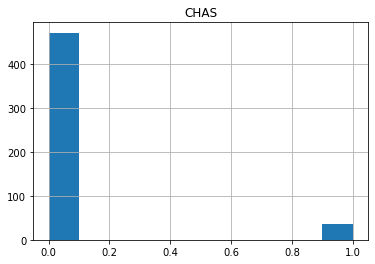

In [9]:
df.hist('CHAS')

array([[<AxesSubplot:title={'center':'RM'}>]], dtype=object)

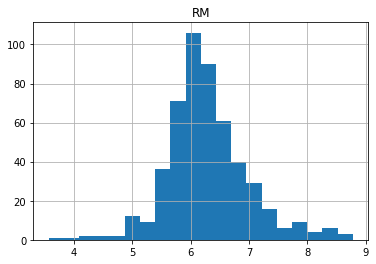

In [10]:
df.hist('RM', bins=20)

In [11]:
# CORRELATION 
corr_matrix = df.corr().round(2)
print(corr_matrix)

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

In [12]:
# MEJORANDO EL GRAFICO DE CORRELACION

corr_matrix_2=round(df.corr(),2)
corr_matrix_2.style.background_gradient()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200000,0.410000,-0.060000,0.420000,-0.220000,0.350000,-0.380000,0.630000,0.580000,0.290000,-0.390000,0.460000,-0.390000
ZN,-0.200000,1.000000,-0.530000,-0.040000,-0.520000,0.310000,-0.570000,0.660000,-0.310000,-0.310000,-0.390000,0.180000,-0.410000,0.360000
INDUS,0.410000,-0.530000,1.000000,0.060000,0.760000,-0.390000,0.640000,-0.710000,0.600000,0.720000,0.380000,-0.360000,0.600000,-0.480000
CHAS,-0.060000,-0.040000,0.060000,1.000000,0.090000,0.090000,0.090000,-0.100000,-0.010000,-0.040000,-0.120000,0.050000,-0.050000,0.180000
NOX,0.420000,-0.520000,0.760000,0.090000,1.000000,-0.300000,0.730000,-0.770000,0.610000,0.670000,0.190000,-0.380000,0.590000,-0.430000
RM,-0.220000,0.310000,-0.390000,0.090000,-0.300000,1.000000,-0.240000,0.210000,-0.210000,-0.290000,-0.360000,0.130000,-0.610000,0.700000
AGE,0.350000,-0.570000,0.640000,0.090000,0.730000,-0.240000,1.000000,-0.750000,0.460000,0.510000,0.260000,-0.270000,0.600000,-0.380000
DIS,-0.380000,0.660000,-0.710000,-0.100000,-0.770000,0.210000,-0.750000,1.000000,-0.490000,-0.530000,-0.230000,0.290000,-0.500000,0.250000
RAD,0.630000,-0.310000,0.600000,-0.010000,0.610000,-0.210000,0.460000,-0.490000,1.000000,0.910000,0.460000,-0.440000,0.490000,-0.380000
TAX,0.580000,-0.310000,0.720000,-0.040000,0.670000,-0.290000,0.510000,-0.530000,0.910000,1.000000,0.460000,-0.440000,0.540000,-0.470000


<AxesSubplot:xlabel='RM', ylabel='MEDV'>

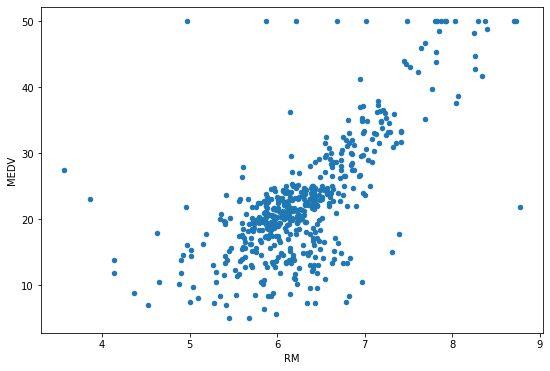

In [13]:
# DATA PREPARATION - FEATURE SELECTION
#Scatter plot is a useful tool to display the relationship between two features
df.plot(kind='scatter',
    x = 'RM',
    y = 'MEDV',
    figsize=(9,6)
)

In [14]:
df.ZN.describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

<AxesSubplot:xlabel='ZN', ylabel='MEDV'>

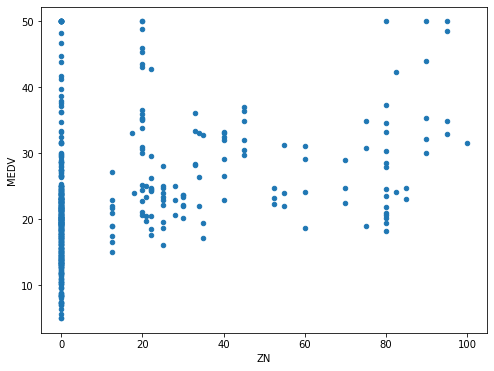

In [15]:
df.plot(kind='scatter', 
    x='ZN',
    y='MEDV',
    figsize=(8,6)
)

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

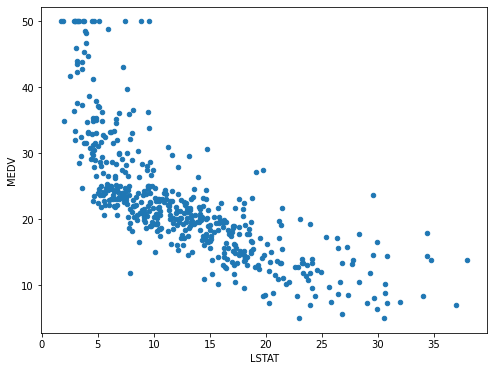

In [16]:
df.plot(kind='scatter',
x='LSTAT',
y='MEDV',
figsize=(8,6)
)

In [17]:
# Establecer las variables para el modelo

X = df[['RM']] # doble bracket para tener un 2-dimensional data
Y = df['MEDV'] # 1 bracket para tener un one-dimensional

In [18]:
# iniciar el modelo (linear regression model)
from sklearn.linear_model import LinearRegression
# instanciar el modelo
model = LinearRegression()

In [19]:
# modelo para dividir los datos
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                    test_size=0.3,
                                                    random_state=1
                                                    )

In [20]:
# ENTRENAR EL MODELO
model.fit(X_train,Y_train)

LinearRegression()

In [21]:
# UNA VEZ HECHO EL FIT REVISAMOS EL INTERCEPT Y SLOPE
model.intercept_.round(2)


-30.57

In [22]:
model.coef_.round(2)

array([8.46])

In [23]:
# Formula del modelo es MEDV = -30.57 + 8.46 * RM

In [42]:
# PREDICTION
# predict() method
# when the averege number of rooms per dwelling is 6.5 the model make the next predict

new_RM = np.array([6.5]).reshape(-1,1) #make sure it's 2d
model.predict(new_RM) # Predict X_test

array([24.42606323])

In [25]:
model.intercept_ + model.coef_*2

array([-13.64884914])

In [26]:
y_test_predicted = model.predict(X_test)
y_test_predicted.shape
type(y_test_predicted)

numpy.ndarray

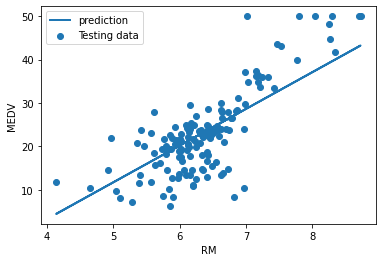

In [27]:
# Evaluamos el modelo haciendo una comparacion visual del modelo fitted y la observacion del set Test
import matplotlib.pyplot as plt
plt.scatter(X_test,Y_test,
label='Testing data'
)
plt.plot(X_test,y_test_predicted,
label='prediction',linewidth=2
)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.show()


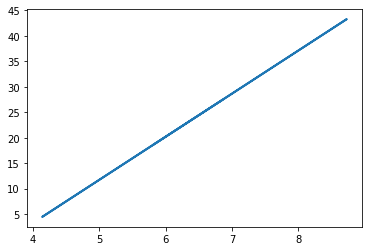

In [28]:
plt.plot(X_test,y_test_predicted,
label='prediction',linewidth=2
)

Text(0, 0.5, 'Residuals')

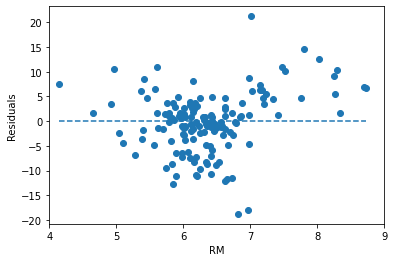

In [29]:
# Residual (difference between the observed value of the target and the predicted value)
residuals = Y_test - y_test_predicted

#plot residual
plt.scatter(X_test, residuals)
#plot a horizontal line at y = 0
plt.hlines(y=0,
xmin=X_test.min(),
xmax=(X_test.max()),
linestyles='--'
)
plt.xlim((4,9))
plt.xlabel('RM')
plt.ylabel('Residuals')

In [30]:
# Evaluacion con Mean Squared Error
residuals.mean()

-0.23645087766388564

In [31]:
(residuals**2).mean()

36.5172147308386

In [32]:
# We can also use the mean_squared_error() method under scikit-learn metrics module to output the same result
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_test_predicted)

# In general, the smaller the MSE, the better, yet there is no absolute good or 
# bad threshold. We can define it based on the dependent variable, i.e., MEDV in 
# the test set. Y_test ranges from 6.3 to 50 with a variance 92.26. 
# Compared to the total variance, a MSE of 36.52 is not bad.


36.517214730838624

In [33]:
import numpy as np
np.std(df['MEDV'])

9.188011545278206

In [34]:
# Evaluacion con R-squared
# r-squared is calculated via model.score()
model.score(X_test,Y_test)

0.6015774471545623

In [35]:
# MULTIVARIATE LINEAR REGRESSION

# MEDV = B0 b1 * RM + b2 * LSTAT

# data preparation
X2 = df[['RM','LSTAT']]
Y = df['MEDV']
#train test splot
#same randome_state to ensure the same splits
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y,
test_size=0.3,
random_state=1
)
model2 = LinearRegression()
model2.fit(X2_train,Y2_train)


LinearRegression()

In [36]:
model2.intercept_
model2.coef_

array([ 4.12674118, -0.67762654])

In [37]:
y_test_predicted2 = model2.predict(X2_test)

In [38]:
mean_squared_error(Y_test, y_test_predicted).round(2)

36.52

In [39]:
mean_squared_error(Y_test, y_test_predicted2).round(2)

28.93